In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv("/content/drive/MyDrive/ML_Bharat_Inter/House_prediction/kc_house_data.csv")

In [6]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
data.shape

(21613, 21)

In [8]:
data.info() #check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
#checking for duplicates
data.duplicated().sum()

0

In [11]:
#find the correlation of each column in a DataFrame
data.corr()

<ipython-input-11-28b5f82a2ac7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [12]:
data.drop(["id", "date", "zipcode"], axis = 1, inplace = True)

In [13]:
sns.pairplot(data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [14]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >, <Axes: >]],
      dtype=object)

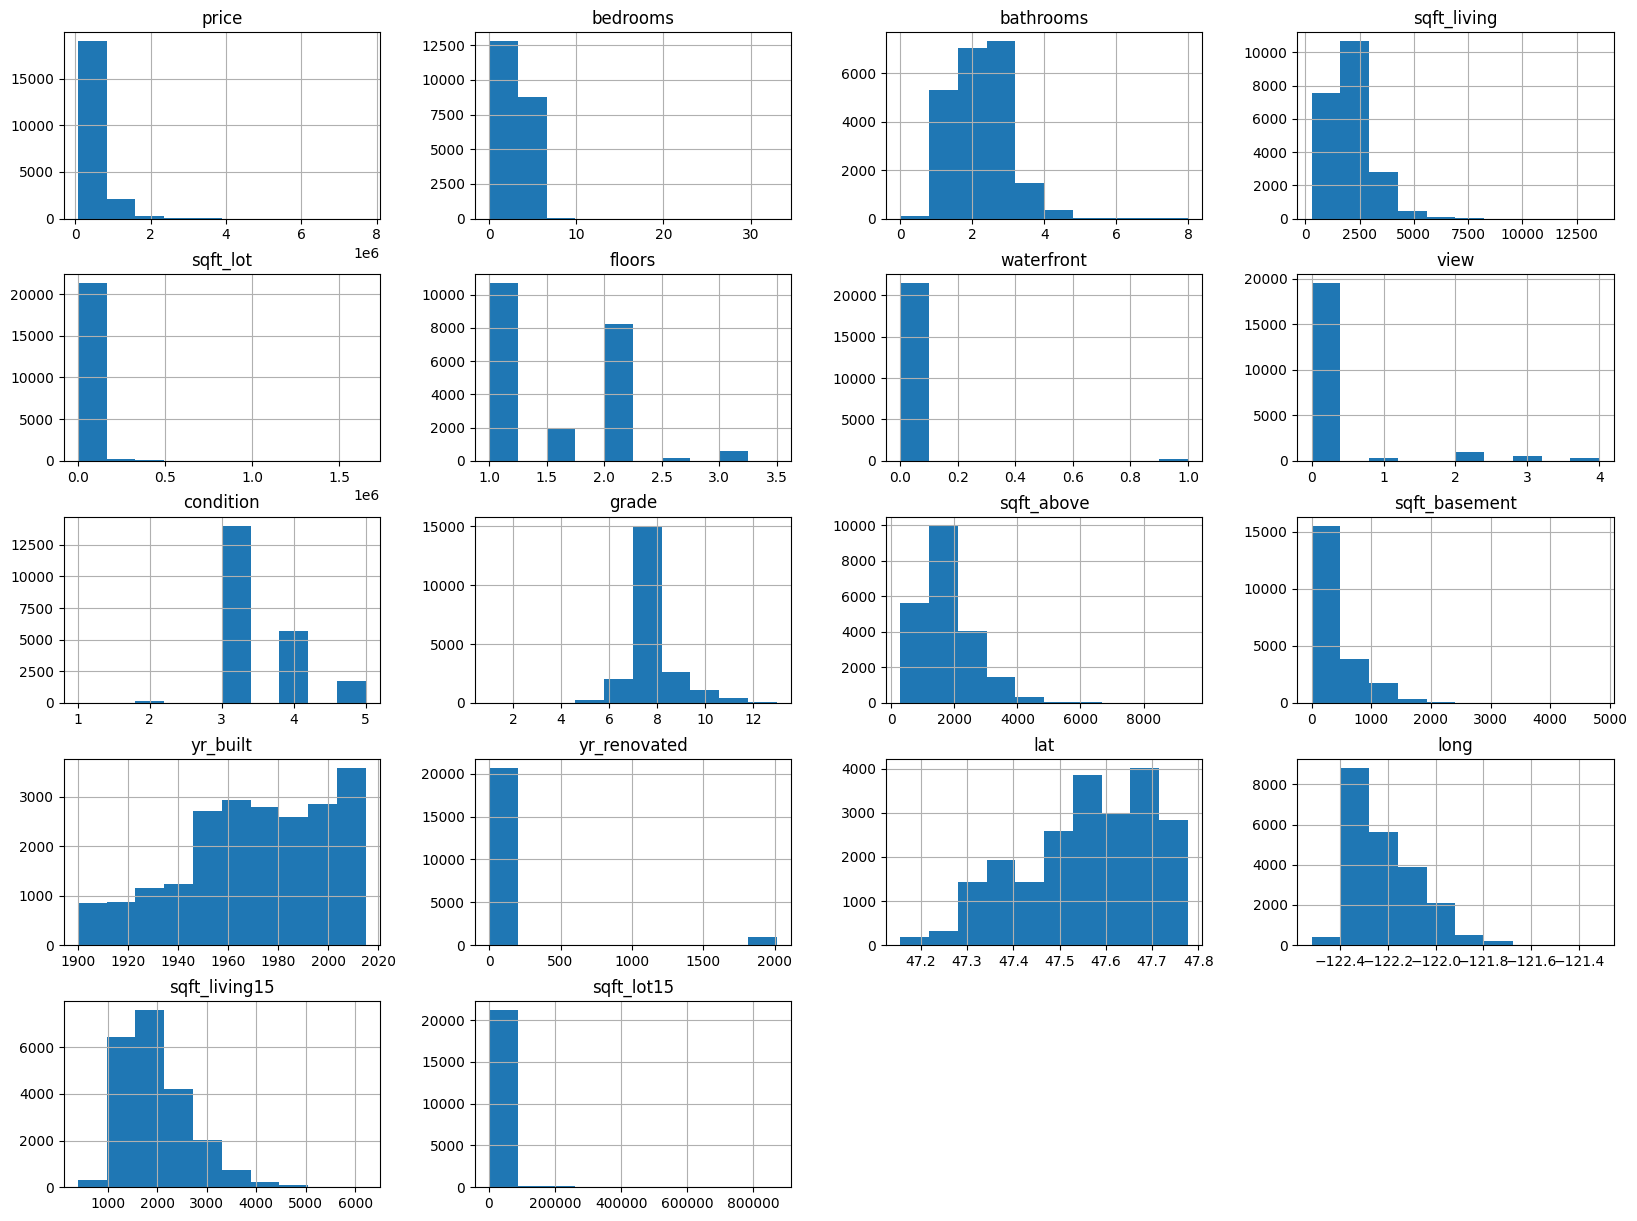

In [15]:
data.hist(figsize=(20,15))

In [16]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248


<Axes: >

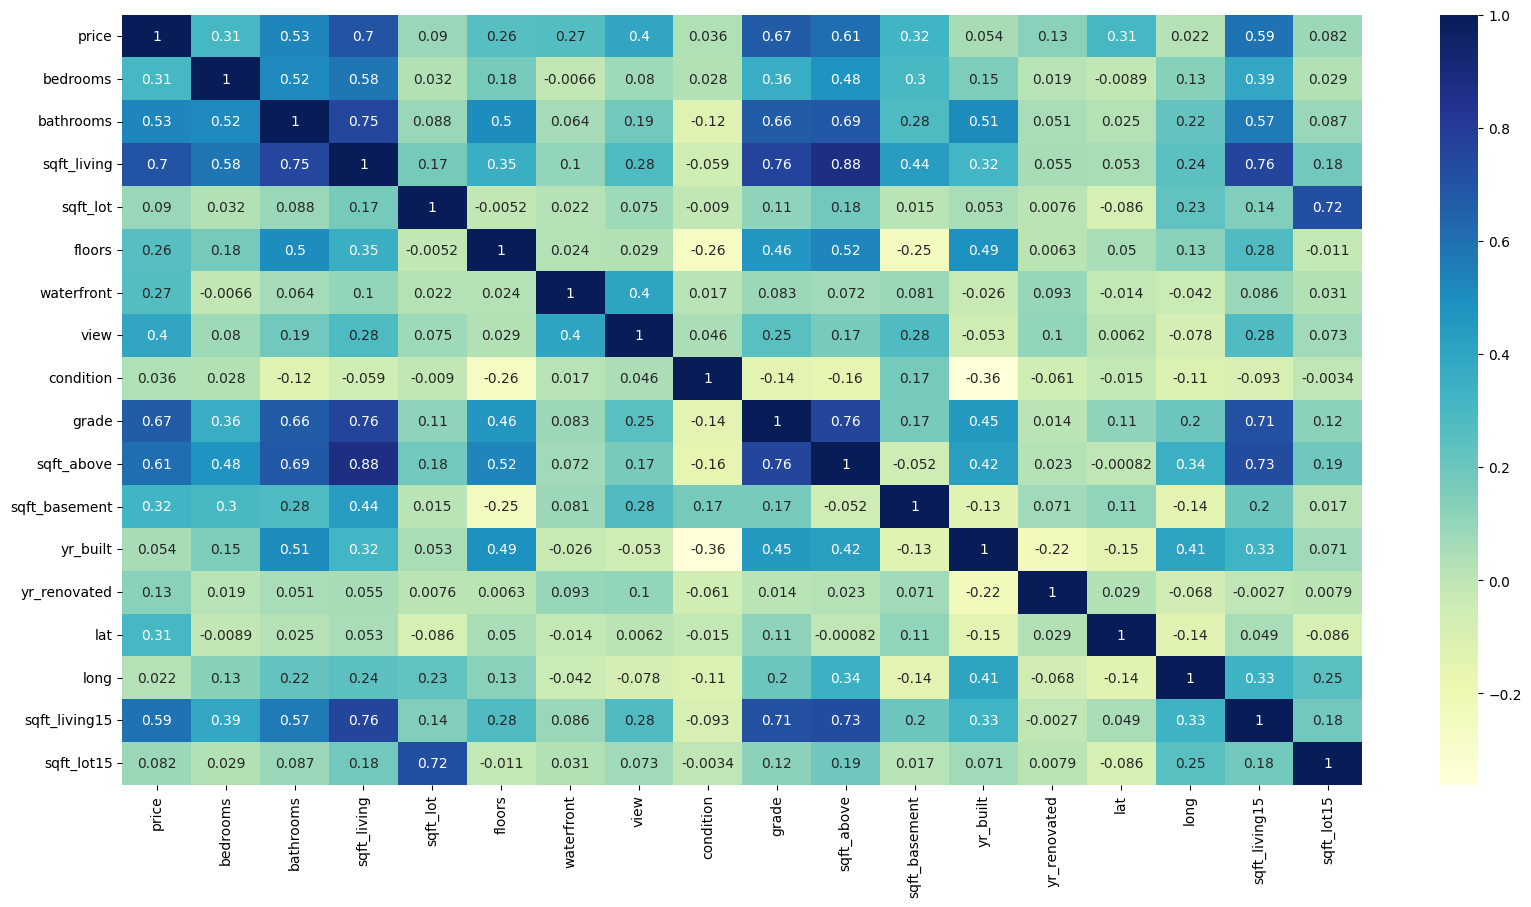

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

In [18]:
data["bedrooms"] = np.log(data["bedrooms"] +1)
data["sqft_living"] = np.log(data["sqft_living"] +1)
data["view"] = np.log(data["view"] +1)
data["sqft_basement"] = np.log(data["sqft_basement"] +1)
data["sqft_lot"] = np.log(data["sqft_lot"] +1)
data["yr_renovated"] = np.log(data["yr_renovated"] +1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >, <Axes: >]],
      dtype=object)

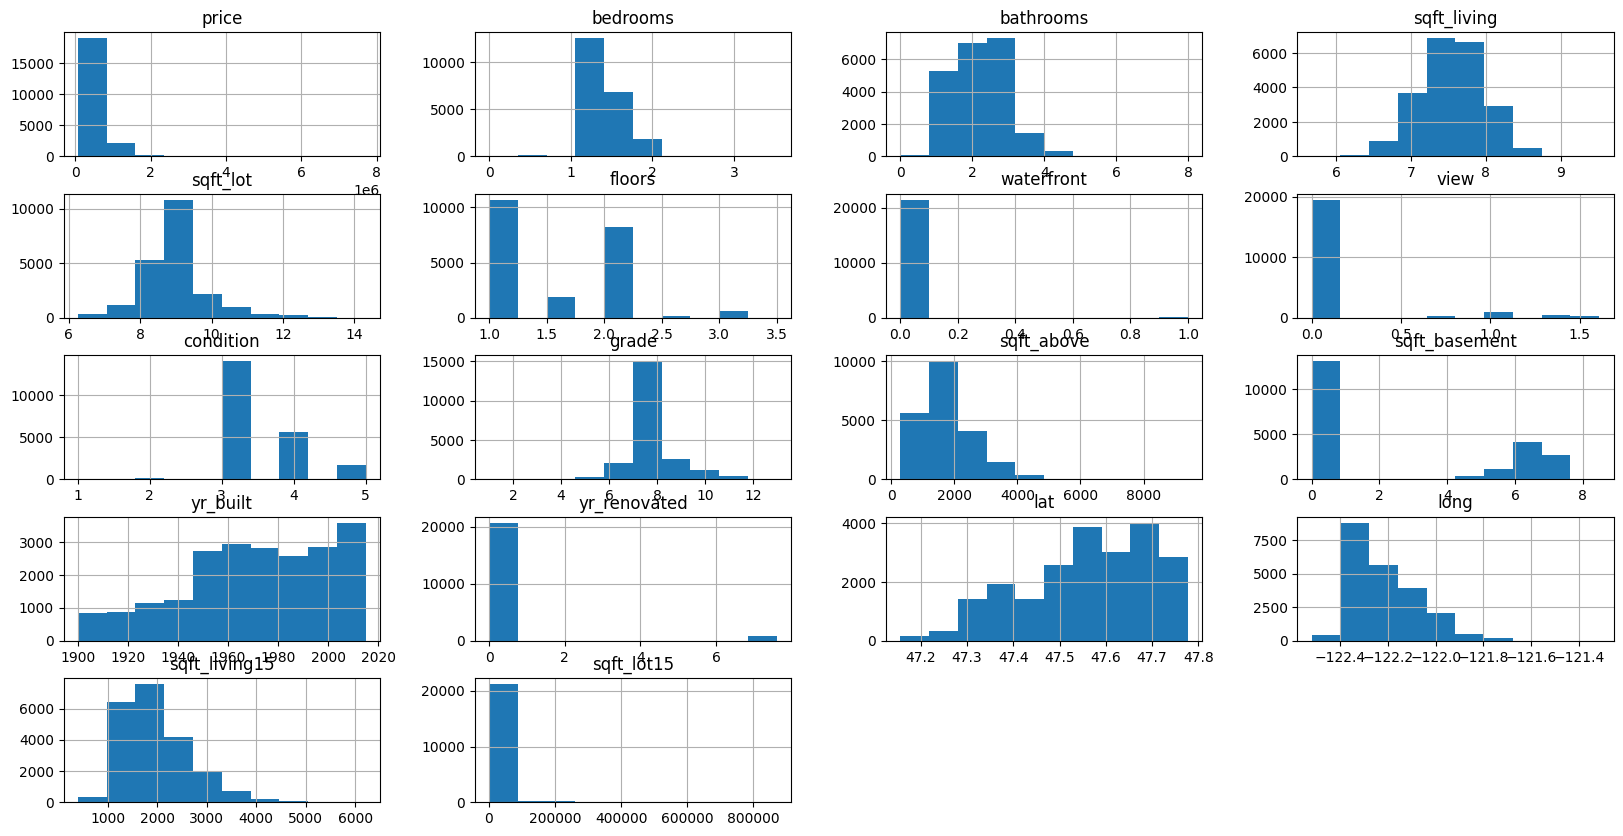

In [19]:
data.hist(figsize=(20,10))

In [20]:
data.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

<Axes: xlabel='lat', ylabel='long'>

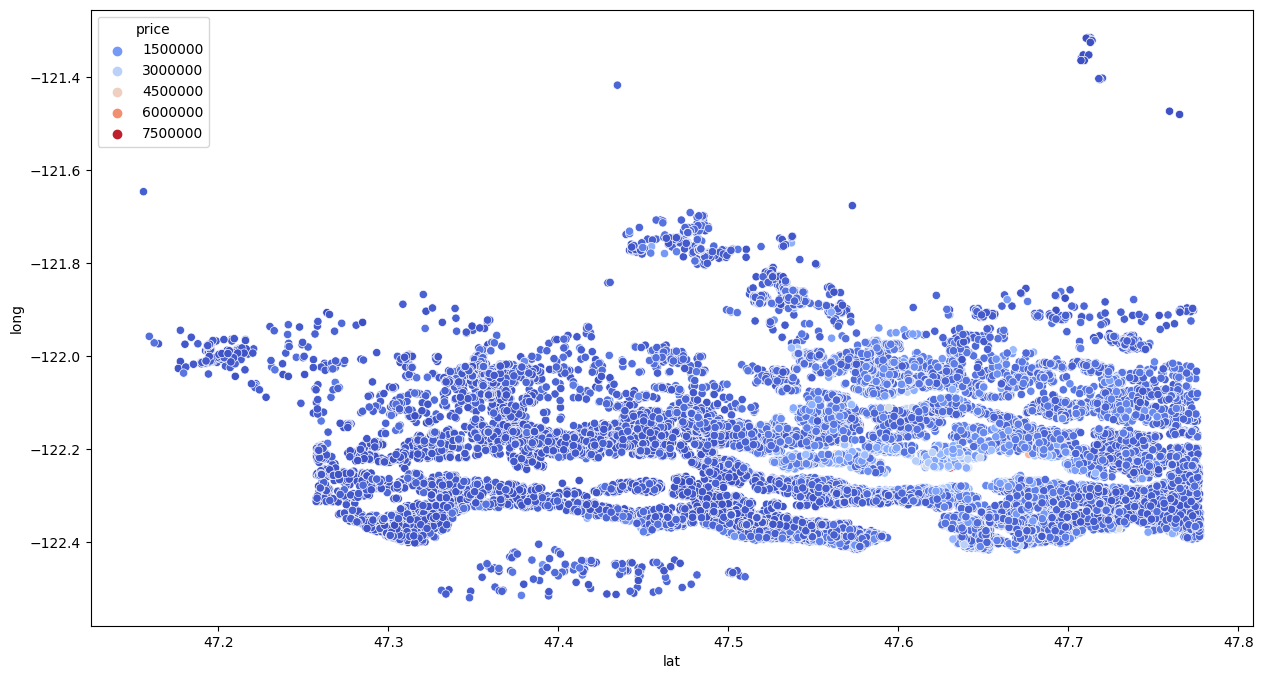

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x ="lat", y="long", data = data, hue = "price", palette = "coolwarm" )

In [22]:
from sklearn.model_selection import train_test_split

x = data.drop(['price'], axis = 1)
y = data['price']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [24]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
21059,1.791759,3.00,8.068090,8.865312,1.0,0,1.098612,3,9,1890,7.170888,2013,0.0,47.5090,-122.240,2270,7623
13443,1.098612,1.00,6.647688,8.548886,1.0,0,0.000000,3,6,770,0.000000,1943,0.0,47.5304,-122.356,920,5160
12526,1.386294,1.75,7.346655,9.003931,1.0,0,0.000000,4,7,1550,0.000000,1959,0.0,47.6136,-122.121,1360,8000
7357,1.386294,1.75,7.791936,9.606630,1.0,0,0.000000,3,8,1380,6.947937,1977,0.0,47.3301,-122.365,2550,14675
638,1.386294,2.00,7.626083,9.495820,1.0,0,0.000000,3,8,2050,0.000000,1993,0.0,47.2681,-122.310,2180,11590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13329,0.693147,1.00,6.673298,9.392745,1.0,0,0.000000,3,6,790,0.000000,1918,0.0,47.5146,-122.265,1900,6000
4759,1.791759,2.50,8.064951,9.532931,2.0,0,0.000000,4,10,3180,0.000000,1990,0.0,47.6520,-122.182,3180,13798
1428,1.609438,3.00,8.064951,11.300202,2.0,0,0.000000,3,11,3180,0.000000,1985,0.0,47.7336,-122.134,3180,38715
5641,1.386294,1.50,6.966967,9.129781,1.0,0,0.000000,4,7,1060,0.000000,1955,0.0,47.3217,-122.318,1270,9375


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #always done on input data
x_train = scaler.fit_transform(x_train)
x_train

array([[ 1.58446251,  1.1519574 ,  1.21321058, ..., -0.18711594,
         0.41164421, -0.18955796],
       [-1.65802677, -1.45017127, -2.12491215, ..., -1.01069038,
        -1.55100114, -0.27892754],
       [-0.31227213, -0.47437302, -0.48225172, ...,  0.65775783,
        -0.91132414, -0.17587857],
       ...,
       [ 0.73157627,  1.1519574 ,  1.20583416, ...,  0.56546069,
         1.73461255,  0.93861048],
       [-0.31227213, -0.79963911, -1.37456664, ..., -0.74089875,
        -1.04216716, -0.12598691],
       [ 1.58446251,  0.50142523,  1.0294536 , ...,  0.95594857,
        -0.73686677,  1.57276074]])

In [26]:
x_train.std()

1.0

In [27]:
x_train.mean()

5.194434116104474e-15

In [28]:
x_test = scaler.transform(x_test)
x_test

array([[-1.65802677, -0.47437302, -0.80669804, ...,  1.28253843,
        -0.79501923, -0.29057497],
       [ 0.73157627,  0.50142523,  0.88154643, ...,  1.44583336,
         0.96409253,  2.77400687],
       [-0.31227213, -0.47437302, -0.59078609, ...,  0.30986863,
        -0.73686677, -0.37758603],
       ...,
       [-0.31227213,  0.17615914,  0.12815189, ..., -0.24391418,
         0.35349175, -0.18146644],
       [ 0.73157627,  1.1519574 ,  1.12312763, ...,  0.75715474,
         1.76368878, -0.21274398],
       [-0.31227213,  0.50142523, -0.43722876, ...,  0.30986863,
         0.17903439, -0.20991376]])

In [29]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf

LinearRegression()

In [30]:
clf.fit(x_train, y_train)

LinearRegression()

In [31]:
clf.score(x_train, y_train)

0.6987171640843644

In [32]:
y_pred = clf.predict(x_test)
y_pred


array([420399.92217492, 591147.23547707, 495994.10564674, ...,
       592160.29260981, 876843.82635454, 320480.34077529])

In [33]:
y_test

5787      455000.0
3209      700000.0
3859      620000.0
14111     468000.0
3626      436500.0
           ...    
15632    2271150.0
17947     290000.0
14429     500000.0
20895     850000.0
14202     280000.0
Name: price, Length: 4323, dtype: float64

In [34]:
from sklearn.metrics import r2_score
r2score = r2_score(y_pred, y_test)
r2score

0.5677140606779146

In [35]:
clf.coef_

array([ -10079.88101498,   46159.28912423, -125534.69043635,
        -17176.29460268,  -12295.1775471 ,   53486.95860492,
         39782.77284037,   28350.15037123,  123163.33809754,
        238737.63078241,   95624.93776246,  -71683.34837328,
         12191.52987961,   75520.91730721,   -8790.062572  ,
         34798.43383134,    1349.50108572])

In [36]:
clf.intercept_

540542.1930017333

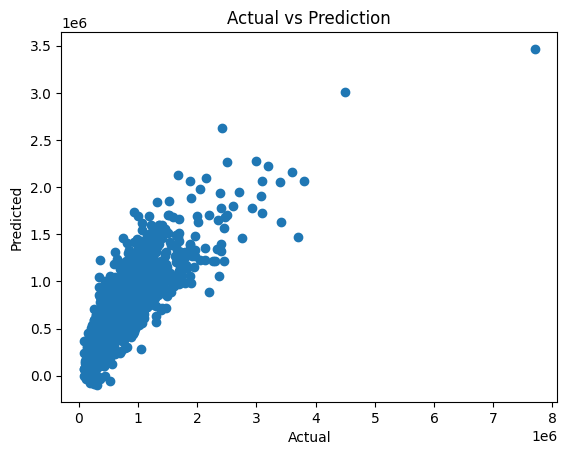

In [37]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.title("Actual vs Prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()